** Python Lab 2**

Welcome back to the python labs! These labs are designed to give you more exposure and experience using python and various packages for data analysis work.

In this lab we will:
- Read in the output file 'Lab_01_output.csv' from the previous lab 1 and donor data imported from a csv file
- Clean and inspect the data
- Explore outliers in the data
- Graph and analyze the new data points
- Leverage the website traffic data to enhance the donor data
- Analyze correlation and strength
- Save the resulting data to a file for future analysis

Let's start by importing some packages and using basically the same code as last time to start off.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
#default notebook setup
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:3f}'.format # suppresses scientific notation in pandas
# Seaborn styling
sns.set(context='paper', style='white')

#### Read in the output file 'Lab_01_output.csv' from the previous lab 1 and donor data imported from a csv file ####

Now let's go ahead and read in only 4 rows of the data we outputted from the previous lab

In [2]:
data = pd.read_csv('../Lab_1/Lab_01_output.csv', encoding = "latin1", nrows=4)
data

,Unnamed: 0,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,pageviews
0,0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,NaN,Desktop,1
1,1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,1
2,2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,1
3,3,NaN,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,NaN,NaN,Desktop,1


We can see an index was written to the file when we saved and output it in the previous lab and on the ingest 'read_csv' it is labeling it 'Unnamed'. So let's tell it there's an index column and confirm with info().

In [3]:
data = pd.read_csv('../Lab_1/Lab_01_output.csv', encoding = "latin1", index_col=0)

data.info() # prints out column names, counts and dtypes in the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 10 columns):
referrer           3740 non-null object
timestamp          4999 non-null object
title              4996 non-null object
url                4999 non-null object
user_agent         4999 non-null object
user_id            4999 non-null object
referrer_domain    3738 non-null object
website_section    3703 non-null object
platform           4999 non-null object
pageviews          4999 non-null int64
dtypes: int64(1), object(9)
memory usage: 429.6+ KB


Ok we now have a single index column and the Watsi web traffic can now be called via the 'data' dataframe object. Let try it with data.head()

In [4]:
data.head() # Quickly display the top 5 rows to eyeball the data

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,pageviews
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,NaN,Desktop,1
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,1
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,1
3,NaN,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,NaN,NaN,Desktop,1
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,NaN,Desktop,1


Now let us go ahead and import some additional donor data that we want to analyze along with this Watsi log data. Read in the 'donations_data.csv' file and call info() on it.

In [5]:
donors = pd.read_csv('donations_data.csv')

donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
TABLE01_AD3_account_id         4260 non-null object
TABLE01_AD3_user_account_id    4260 non-null object
TABLE01_AD3_lifetime_amount    4260 non-null float64
dtypes: float64(1), object(2)
memory usage: 99.9+ KB


Pandas can read in a variety of file formats. In addition to the *read_csv* function you might also find the following reading functions useful. Most read functions have a *chunksize* parameter which will allow you to read in large files in chunks and iterate over them. This is useful when reading in a large file that either cannot be loaded into memory or throws errors. One approach in using *chunksize* is to read large files in chunks and writing the chunks to a local SQL database thus allowing you to pull in from the database only those data points needed for your analysis at that time
* Microsoft Excel files - [read_excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel-reader)
* SAS files (ex.sas7bdat) - [read_sas](https://pandas.pydata.org/pandas-docs/stable/io.html#io-sas-reader)
* SQL - [read_sql](https://pandas.pydata.org/pandas-docs/stable/io.html#io-sql)
* Google Big Query - [read_gbq](https://pandas.pydata.org/pandas-docs/stable/io.html#io-bigquery)
* JSON - [read_json](https://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader)
* HDF5 Format - [read_hdf](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)
* Local clipboard - [read_clipboard](https://pandas.pydata.org/pandas-docs/stable/io.html#io-clipboard)

Let's preview the first 10 rows

In [6]:
donors.head(10) # n=10 works as well

,TABLE01_AD3_account_id,TABLE01_AD3_user_account_id,TABLE01_AD3_lifetime_amount
0,200016L_SILVER,LESLI L,30.000000
1,200028M_BRONZE,MARLO R,2655.000000
2,200053N_BRONZE,NELLA O,6.000000
3,200116K_BRONZE,KAITLYN D,1250.000000
4,200118M_BRONZE,MELYNDA N,5075.000000
5,200152B_BRONZE,BUD I,1037.500000
6,200210H_GOLD,HERLINDA O,355.000000
7,200287A_BRONZE,ALYSE R,1250.000000
8,200334L_BRONZE,LORAINE K,25.000000
9,200425V_BRONZE,VON P,100.000000


And the tail of the dataset..

In [7]:
donors.tail() # the tail of the dataset

,TABLE01_AD3_account_id,TABLE01_AD3_user_account_id,TABLE01_AD3_lifetime_amount
4255,299920K_SILVER,KAYLEEN E,10.000000
4256,299921C_GOLD,CRISSY K,1595.000000
4257,299934C_SILVER,CARISA Q,175.000000
4258,299936N_SILVER,NEVADA I,35.000000
4259,299943O_SILVER,OLIVIA N,50.000000


#### Clean and inspect the data ####

Let's go ahead and clean up the column fields and strip the table name from the front of them

In [8]:
donors.rename(columns = lambda x: x.strip('TABLE01_AD3_'), inplace=True)

And change the 'lifetime_amount' column from float to integer

In [9]:
donors['lifetime_amount'] = donors['lifetime_amount'].astype(int)

Inspect the changes..

In [10]:
donors.head()

,account_id,user_account_id,lifetime_amount
0,200016L_SILVER,LESLI L,30
1,200028M_BRONZE,MARLO R,2655
2,200053N_BRONZE,NELLA O,6
3,200116K_BRONZE,KAITLYN D,1250
4,200118M_BRONZE,MELYNDA N,5075


Now it appears there's additional fields we might want nestled in the 'account_id' values. Let us go ahead and tease that out into a new column titled 'donor_level'

In [11]:
donors['donor_level'] = donors['account_id'].str.split('_').str[1]
donors

,account_id,user_account_id,lifetime_amount,donor_level
0,200016L_SILVER,LESLI L,30,SILVER
1,200028M_BRONZE,MARLO R,2655,BRONZE
2,200053N_BRONZE,NELLA O,6,BRONZE
3,200116K_BRONZE,KAITLYN D,1250,BRONZE
4,200118M_BRONZE,MELYNDA N,5075,BRONZE
...,...,...,...,...
4255,299920K_SILVER,KAYLEEN E,10,SILVER
4256,299921C_GOLD,CRISSY K,1595,GOLD
4257,299934C_SILVER,CARISA Q,175,SILVER
4258,299936N_SILVER,NEVADA I,35,SILVER


And now let's trim the 'account_id' column using pandas.Series.str.extract

In [12]:
donors['account_id'] = donors['account_id'].str.extract('(......[A-Z])', expand=True)
donors

,account_id,user_account_id,lifetime_amount,donor_level
0,200016L,LESLI L,30,SILVER
1,200028M,MARLO R,2655,BRONZE
2,200053N,NELLA O,6,BRONZE
3,200116K,KAITLYN D,1250,BRONZE
4,200118M,MELYNDA N,5075,BRONZE
...,...,...,...,...
4255,299920K,KAYLEEN E,10,SILVER
4256,299921C,CRISSY K,1595,GOLD
4257,299934C,CARISA Q,175,SILVER
4258,299936N,NEVADA I,35,SILVER


Let's inspect the break out count of the donors['donor_level'] column

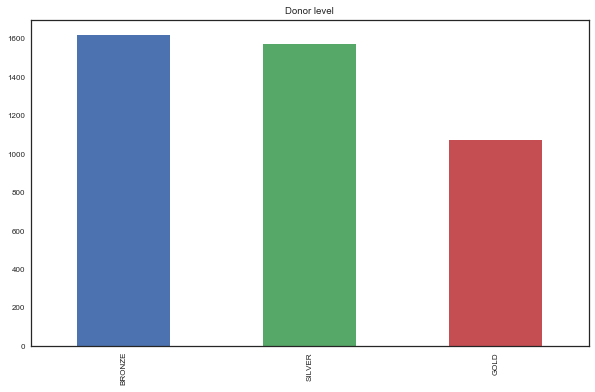

In [13]:
donors['donor_level'].value_counts().plot(kind='bar', figsize=(10,6), title="Donor level");

Explore the lifetime_amount using a histogram...but something might seem odd in the plot

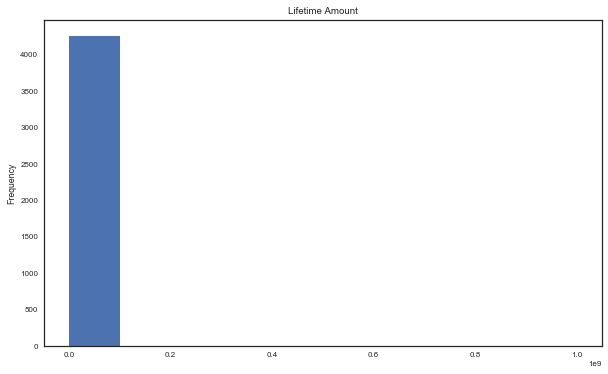

In [14]:
donors['lifetime_amount'].plot(kind='hist', figsize=(10,6), title='Lifetime Amount');

#### Explore outliers in the data ####

Using Seaborns boxplot to visualize the distribution of the ['lifetime_amount'] column broken out by donor level makes it easier to see the outlier in the top right in the gold donor level. Try this code out in the next cell.
https://seaborn.pydata.org/generated/seaborn.factorplot.html

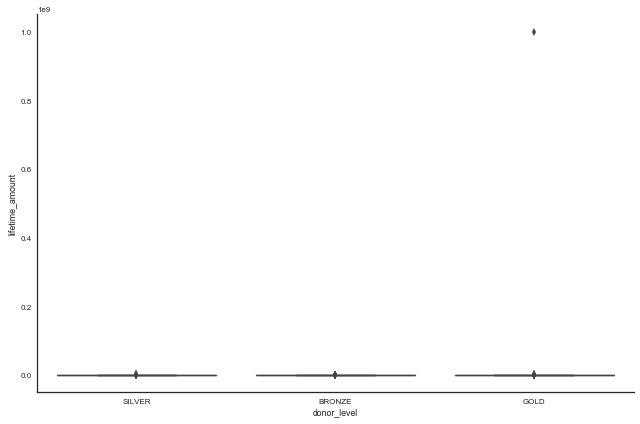

In [15]:
sns.factorplot(kind='box',     # type of plot
               x='donor_level',     # x-axis values
               y='lifetime_amount', # y-axis values
               data=donors,     # data or dataframe
               size=6,     # figure size (x100px)
               aspect=1.5,     # width = size *aspect
               legend_out=False,     # legend in/out
               palette='husl'     # palette color
              );

# https://seaborn.pydata.org/generated/seaborn.factorplot.html

And by using the describe() method you can see that the max of the 'lifetime_amount' column is 999999999. That does not seem to be a valid amount

In [16]:
donors.describe()

,lifetime_amount
count,4260.000000
mean,239485.002582
std,15321347.380355
min,1.000000
25%,20.000000
50%,40.000000
75%,150.000000
max,999999999.000000


Let's inspect the row where 'lifetime_amount' == 999999999

In [17]:
donors[donors['lifetime_amount'] == 999999999]

,account_id,user_account_id,lifetime_amount,donor_level
3321,278726S,TEST ACCOUNT_ZZ,999999999,GOLD


Seems like that is from a test account so let's drop that row from the dataset

In [18]:
donors.drop(([3321]), inplace=True)

Check to make sure that row and amount is gone

In [19]:
donors[donors['lifetime_amount'] == 999999999]

,account_id,user_account_id,lifetime_amount,donor_level


#### Graph and analyze the new data points ####

Now let's replot using Seaborns boxplot as before..

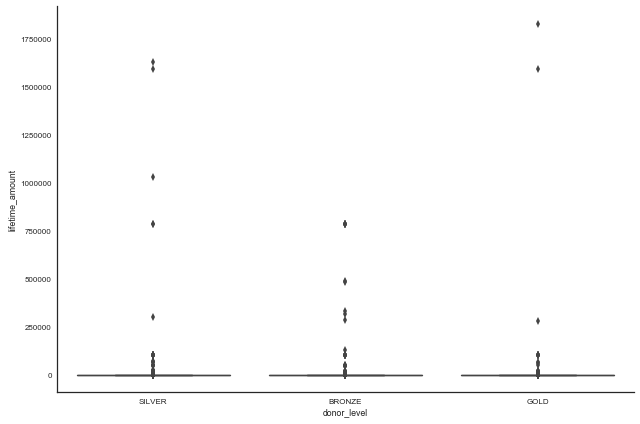

In [20]:
sns.factorplot(kind='box',     # type of plot
               x='donor_level',     # x-axis values
               y='lifetime_amount', # y-axis values
               data=donors,     # data or dataframe
               size=6,     # figure size (x100px)
               aspect=1.5,     # width = size *aspect
               legend_out=False,     # legend in/out
               palette='husl'     # palette color
              );

This looks better. We still see some outliers in the data but they are not test accounts so let's leave them in there for now.

We can re-plot the data using Seaborn's distplot which is basically a histogram combined with 'rug=True' making it easier to see the individual data points. 'rug=True' adds ticks along the axis to represent data points. Check out the next chunk of code.
https://seaborn.pydata.org/generated/seaborn.distplot.html

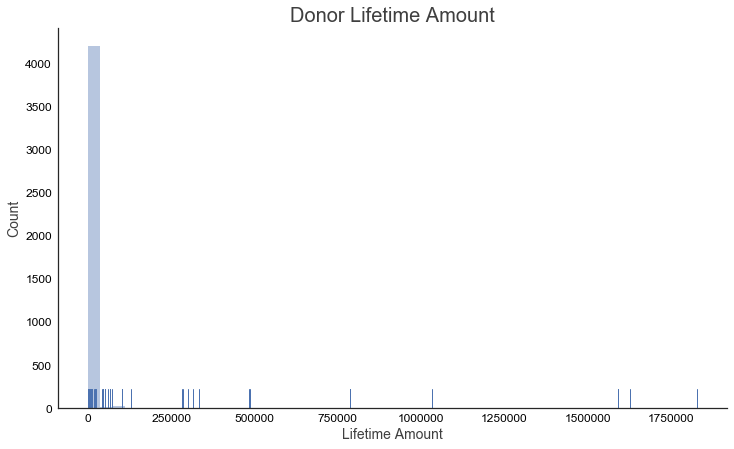

In [21]:
graph = sns.distplot(donors['lifetime_amount'], rug=True, hist=True, kde=False); # Creates the graph
# https://seaborn.pydata.org/generated/seaborn.distplot.html

# Seaborn despine() to removes the top and right line in graph..this cleans it up
sns.despine()

# Set the size of the graph from here
graph.figure.set_size_inches(12,7)
# Set the Title of the graph from here
graph.axes.set_title('Donor Lifetime Amount', fontsize=20,color="black", alpha=0.75)
# Set the xlabel of the graph from here
graph.set_xlabel("Lifetime Amount",size = 14,color="black",alpha=0.75)
# Set the ylabel of the graph from here
graph.set_ylabel("Count",size = 14,color="black",alpha=0.75)
# Set the ticklabel size and color of the graph from here
graph.tick_params(labelsize=12, labelcolor="black")

#### Leverage the website traffic data to enhance the donor data ####

So we have information on 4259 donors and we now know there is way more smaller donations than larger ones but there are some rather large donations. We explored their donor level and lifetime amount but we also have their web activity. Let's see if we can calculate their total pageviews and the last time they were on the site to gauge engagement as well as figure out what's their preferred device.

To do this we'll build three dictionaries where the user_ids are the keys in all of them and the values are lists of timestamps in one dictionary, list of devices in the other dictionary and pageviews in the last.

Dictionary #1 { 'user_id (KEY)' : [timestamp1, timestamp2..] }  
Dictionaries #2 { 'user_id (KEY)' : [device1, device2..] }  
Dictionaries #3 { 'user_id (KEY)' : [pageview1, pageview2..] }

First let's import some additional modules into our environment. Import 'defaultdict' from the *collections* module and 'mode' from *statistics* as we're going to be using them.

In [22]:
from collections import defaultdict     # provides the initial default value for the dict
# https://docs.python.org/2/library/collections.html#collections.defaultdict

from statistics import mode     # to calculate the mode..we'll use later
# https://docs.python.org/3.4/library/statistics.html#module-statistics

Now let's create the dictionaries and the code that builds them out

In [23]:
engagement_by_id = defaultdict(list)     # Dictionary for keeping track of engagement 
devices_by_id = defaultdict(list)     # And a Dictionary to keep track of devices
pageviews_by_id = defaultdict(list)     # Dictionary to keep track of pageviews
# Note: a defaultdict will never raise a KeyError. Any key that does not exist gets the value returned by the default factory.
# In this case a list since we are building a dictionary with key:list

Now iterate through the 'data' dataframe..

In [24]:
for index, row in data.iterrows():     # A dataframe generator that iterates over the rows of the frame as (index, row) pairs.
    key = row['user_id']
    engagement_by_id[key].append(row['timestamp'])
    devices_by_id[key].append(row['platform'])
    pageviews_by_id[key].append(row['pageviews'])

Call the dicitonaries to check the work...

In [25]:
engagement_by_id     # A dictionary of user's ids attached to a list of timestamps collected from website hit data

defaultdict(list,
            {'CHAROLETTE S': ['2016-02-05 00:48:23'],
             'WARREN Q': ['2016-02-24 23:12:10'],
             'MITCHEL O': ['2015-12-25 17:59:35'],
             'MICHEL O': ['2016-02-05 21:19:30', '2016-01-30 16:34:06'],
             'ANDREE N': ['2016-02-14 19:30:08', '2016-02-11 21:52:16'],
             'SHAREN Y': ['2015-10-15 06:04:40'],
             'BRICE Z': ['2015-12-25 10:23:43'],
             'TAMICA R': ['2015-11-04 23:09:54', '2015-11-04 23:13:18'],
             'SHELLIE U': ['2015-11-24 18:36:01'],
             'ELIJAH S': ['2015-10-03 11:07:51'],
             'DESTINY B': ['2015-10-09 19:42:12'],
             'JEFFERY B': ['2015-09-29 19:58:23'],
             'TOMIKA P': ['2015-09-21 05:46:57'],
             'HUI V': ['2015-11-04 22:08:12'],
             'MALISA J': ['2016-03-06 15:31:04'],
             'SCOTT B': ['2016-02-17 10:20:19'],
             'MARCELA G': ['2015-12-16 19:34:22'],
             'OLIVA V': ['2015-11-18 09:23:57'],
          

In [26]:
devices_by_id     # A dictionary of user's ids attached to a list of devices collected from website hit data

defaultdict(list,
            {'CHAROLETTE S': ['Desktop'],
             'WARREN Q': ['Desktop'],
             'MITCHEL O': ['Desktop'],
             'MICHEL O': ['Desktop', 'Desktop'],
             'ANDREE N': ['Desktop', 'Desktop'],
             'SHAREN Y': ['Desktop'],
             'BRICE Z': ['Desktop'],
             'TAMICA R': ['Desktop', 'Desktop'],
             'SHELLIE U': ['Desktop'],
             'ELIJAH S': ['Android'],
             'DESTINY B': ['iPhone'],
             'JEFFERY B': ['Desktop'],
             'TOMIKA P': ['iPhone'],
             'HUI V': ['Desktop'],
             'MALISA J': ['Desktop'],
             'SCOTT B': ['Android'],
             'MARCELA G': ['iPhone'],
             'OLIVA V': ['Desktop'],
             'KARLA T': ['Desktop'],
             'YI P': ['Desktop'],
             'JENISE Y': ['iPhone'],
             'CHELSEA G': ['Desktop', 'Desktop', 'Desktop'],
             'ALTA O': ['Desktop'],
             'VALARIE W': ['Desktop'],
             'JAMAR T

In [27]:
pageviews_by_id     # A dictionary of user's ids attached to a list of pageviews collected from website hit data

defaultdict(list,
            {'CHAROLETTE S': [1],
             'WARREN Q': [1],
             'MITCHEL O': [1],
             'MICHEL O': [1, 1],
             'ANDREE N': [1, 1],
             'SHAREN Y': [1],
             'BRICE Z': [1],
             'TAMICA R': [1, 1],
             'SHELLIE U': [1],
             'ELIJAH S': [1],
             'DESTINY B': [1],
             'JEFFERY B': [1],
             'TOMIKA P': [1],
             'HUI V': [1],
             'MALISA J': [1],
             'SCOTT B': [1],
             'MARCELA G': [1],
             'OLIVA V': [1],
             'KARLA T': [1],
             'YI P': [1],
             'JENISE Y': [1],
             'CHELSEA G': [1, 1, 1],
             'ALTA O': [1],
             'VALARIE W': [1],
             'JAMAR T': [1, 1],
             'DENISHA U': [1],
             'DANTE V': [1],
             'HUI M': [1],
             'ROSETTA X': [1, 1, 1],
             'VANESA Q': [1],
             'CASSIDY U': [1, 1, 1, 1, 1],
             'BREANN

So now let us calculate the last time a donor was on the website by returning the max timestamp in the list of values when we look up the donor in the 'engagement_by_id' dictionary we just built.

We can also retrieve the "preferred device" by returning the most frequented device or mode of the list of values when we look up the donor in the 'devices_by_id' dictionary.

And we can sum of the pageviews in the 'pageviews_by_id' dictionary to provide the total pageviews by donor. Let's call donors.head()

In [28]:
donors.head()

,account_id,user_account_id,lifetime_amount,donor_level
0,200016L,LESLI L,30,SILVER
1,200028M,MARLO R,2655,BRONZE
2,200053N,NELLA O,6,BRONZE
3,200116K,KAITLYN D,1250,BRONZE
4,200118M,MELYNDA N,5075,BRONZE


So we would like to leverage the web data and add three columns to the donors dataframe. To do that we'll create three new columns in the donors dataframe and use the three dictionaries to get our values for our new columns. One for 'preferred_device', another value for 'last_seen', and fiinally 'total_pageviews'.

In [29]:
for row_id, row in donors.iterrows():  # A dataframe generator that iterates over the rows of the frame as (index, row) pairs.
    key = row[1]     # Sets the key variable
    last_seen = max(engagement_by_id[key]) # Use the key to return the max timestamp from dictionary
    total_pageviews =sum(pageviews_by_id[key]) # Use the key to return the sum pageviews from dictionary
    try:
        preferred_device = mode(devices_by_id[key]) # Use the key to return the mode of the device list from dicitonary
    except:
        preferred_device = devices_by_id[key][-1] # Pick most recent if there's no clear mode
    
    # For each row set the new values for 'preferred_device', 'last_seen', and 'total_pageviews'. 
    donors.set_value(row_id, 'preferred_device', preferred_device)
    donors.set_value(row_id, 'last_seen', last_seen)
    donors.set_value(row_id, 'total_pageviews', total_pageviews)  

/Users/jburge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/jburge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/jburge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


And let's change the 'total_pageviews' column from float to integer to tidy it up

In [30]:
donors['total_pageviews'] = donors['total_pageviews'].astype(int)

Now let's preview the results..

In [31]:
donors.head()

,account_id,user_account_id,lifetime_amount,donor_level,preferred_device,last_seen,total_pageviews
0,200016L,LESLI L,30,SILVER,Desktop,2015-12-21 20:33:21,1
1,200028M,MARLO R,2655,BRONZE,Desktop,2015-12-05 00:48:58,1
2,200053N,NELLA O,6,BRONZE,Desktop,2015-11-05 23:54:49,1
3,200116K,KAITLYN D,1250,BRONZE,Desktop,2016-02-12 20:34:14,1
4,200118M,MELYNDA N,5075,BRONZE,iPhone,2016-01-21 00:07:01,1


#### Analyze correlation and strength ####

We have now taken the website data, extracted insights out of that data so that we can combine it with and enhance the information we have on our donors. At this point let's use the new data and see if there's a relationship between the number of total pageviews a donor has generated and the amount they've donated. One way to visualize this is by doing a bi-variate analysis. https://en.wikipedia.org/wiki/Bivariate_analysis

A good graphing function to use for bivariate analysis is Seaborn's joinplot() as it provides both a scatterplot and histograms in one. http://seaborn.pydata.org/generated/seaborn.jointplot.html  

Let's call Seaborn's joinplot() but first let's set some styling parameters.

*Seaborn styling* - A separate set of parameters control the scale of plot elements in Seaborn yet they have presets to help. The four presets in order of relative size, are paper, notebook, talk, and poster. Set 'context=' to these presets to adjust scale 
    
http://seaborn.pydata.org/generated/seaborn.set_context.html for examples https://seaborn.pydata.org/tutorial/aesthetics.html  

In [32]:
sns.set(context='talk', style='white')

Setting context to 'talk' means it's the third largest parameter in overall scale so the graph should be easier to read. Now let's create the jointplot().

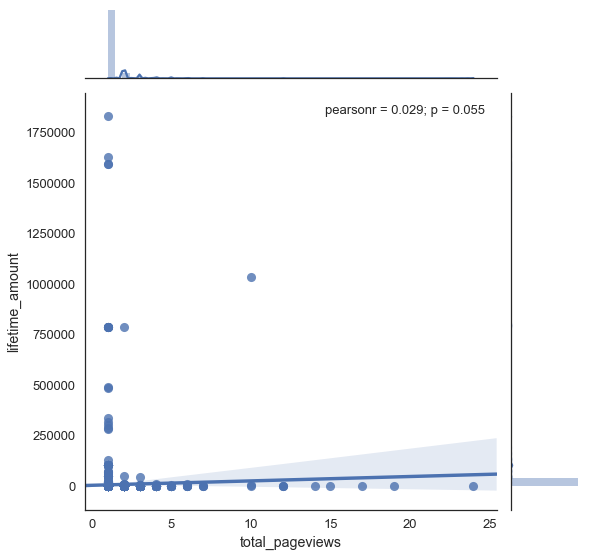

In [33]:
sns.jointplot(kind='reg', # setting to 'reg' draws a regression plot
              x='total_pageviews',
              y='lifetime_amount',
              data=donors,
              size=8);

# http://seaborn.pydata.org/generated/seaborn.jointplot.html

So we are using dummy data here so it's not suprising to see no relationship but you do get a chance to see how easy it is to do a regression plot. Also notice the histogram on the top representing the x-axis and along the right representing the y-axis. You also have the pearson correlation results and p-value.

#### Save the resulting data to a file for future analysis ####

Let's quickly preview the donors dataframe again before we save it.

In [34]:
donors.head(2)

,account_id,user_account_id,lifetime_amount,donor_level,preferred_device,last_seen,total_pageviews
0,200016L,LESLI L,30,SILVER,Desktop,2015-12-21 20:33:21,1
1,200028M,MARLO R,2655,BRONZE,Desktop,2015-12-05 00:48:58,1


Let's now save the 'donors' dataframe to a csv for future analysis.

In [35]:
donors.to_csv('Lab_02_output.csv', )

And we can now bring this lab to an end and get ready for lab 3. Good job!